In [2]:
from pycaret.regression import *
from pycaret.datasets import get_data
import pandas as pd
df0 = pd.read_csv('C:/Users/Rui/OneDrive/桌面/data_xn/USDSEK_six_hourly_data.csv')
print(df0.shape)
df0.head()

(1469, 12)


,datetime,v,vw,o,c,h,l,t,n,hourly_vwap,hourly_liquidity,fd
0,2011-01-02 12:00:00,192.000000,6.716390,6.713780,6.720500,6.72248,6.70740,1.290000e+13,192.000000,1289.546880,192.000000,12732.095491
1,2011-01-02 18:00:00,433.833333,6.726304,6.724543,6.724963,6.74035,6.70810,1.892000e+13,433.833333,2918.484657,433.833333,13452.196382
2,2011-01-03 00:00:00,2121.166667,6.726793,6.728440,6.728170,6.74780,6.71510,4.257000e+13,2121.166667,14274.910907,2121.166667,64867.482161
3,2011-01-03 06:00:00,4846.000000,6.707128,6.709368,6.704232,6.73073,6.67950,7.740000e+13,4846.000000,32497.070182,4846.000000,94593.011907
4,2011-01-03 12:00:00,1566.000000,6.694865,6.694465,6.696038,6.70700,6.68098,7.675500e+13,1566.000000,10482.447792,1566.000000,60184.473482


In [3]:
(df0.isnull().sum() / len(df0)).sort_values(ascending=False)[:20]

vw                  0.24983
o                   0.24983
c                   0.24983
h                   0.24983
l                   0.24983
hourly_vwap         0.24983
fd                  0.24983
datetime            0.00000
v                   0.00000
t                   0.00000
n                   0.00000
hourly_liquidity    0.00000
dtype: float64

In [4]:
df = df0.dropna(subset=['hourly_vwap'])  # Replace 'column_name' with the name of the column

In [5]:
data = df.sample(frac=0.7, random_state=786)
data_unseen = df.drop(data.index)
 
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
 
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (771, 12)
Unseen Data For Predictions: (331, 12)


In [6]:
from pycaret.regression import *
setup(data = data, target = 'hourly_vwap', session_id=123) 

,Description,Value
0,Session id,123
1,Target,hourly_vwap
2,Target type,Regression
3,Original data shape,"(771, 12)"
4,Transformed data shape,"(771, 12)"
5,Transformed train set shape,"(539, 12)"
6,Transformed test set shape,"(232, 12)"
7,Numeric features,10
8,Categorical features,1
9,Preprocess,True


In [7]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,362.8827,909849.1717,851.6805,0.9958,0.1133,0.0413,0.2580
gbr,Gradient Boosting Regressor,539.4939,948284.0881,916.6777,0.9958,0.1103,0.0498,0.2580
lr,Linear Regression,543.1479,1108382.3108,985.3702,0.9949,0.1305,0.0567,0.5030
lasso,Lasso Regression,541.4397,1096455.4274,979.8013,0.9949,0.1293,0.0563,0.3520
ridge,Ridge Regression,541.7025,1095957.8689,979.7314,0.9949,0.1292,0.0562,0.3620
lar,Least Angle Regression,572.4961,1162459.3528,1013.0933,0.9947,0.1305,0.0576,0.2240
rf,Random Forest Regressor,608.1082,1259361.0606,1059.5379,0.9944,0.1243,0.0523,0.2920
en,Elastic Net,707.7011,1384840.0085,1139.0887,0.9938,0.1282,0.0559,0.2480
dt,Decision Tree Regressor,702.0215,1626596.3100,1240.3605,0.9932,0.1561,0.0538,0.2120
br,Bayesian Ridge,894.0529,1746427.0973,1296.8304,0.9923,0.1334,0.0656,0.2160


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [8]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,336.0613,397503.1360,630.4785,0.9984,0.0488,0.0188
1,533.7395,2065644.1416,1437.2349,0.9910,0.1986,0.0749
2,243.8363,177875.2447,421.7526,0.9991,0.0480,0.0195
3,370.6609,785344.0690,886.1964,0.9961,0.0632,0.0268
4,254.6294,159402.4381,399.2523,0.9993,0.0312,0.0149
5,309.3822,288715.7304,537.3227,0.9990,0.0752,0.0268
6,357.5631,1328902.8752,1152.7805,0.9928,0.2534,0.1089
7,343.5331,444025.4081,666.3523,0.9987,0.0751,0.0285
8,329.0619,412543.0763,642.2952,0.9989,0.1777,0.0609


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,650.9400,1114271.7034,1055.5907,0.9956,0.0539,0.0317
1,804.4486,3169675.3151,1780.3582,0.9861,0.1512,0.0608
2,628.5513,804415.5920,896.8922,0.9958,0.1191,0.0662
3,601.4620,1464009.6609,1209.9627,0.9927,0.1132,0.0433
4,578.1192,653718.5840,808.5287,0.9972,0.0901,0.0438
5,537.2113,629956.0682,793.6977,0.9979,0.1106,0.0447
6,587.7990,1788863.2388,1337.4839,0.9903,0.2634,0.1282
7,757.7316,2613926.0312,1616.7641,0.9924,0.0878,0.0426
8,878.5022,3872855.8524,1967.9573,0.9894,0.1999,0.0853


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


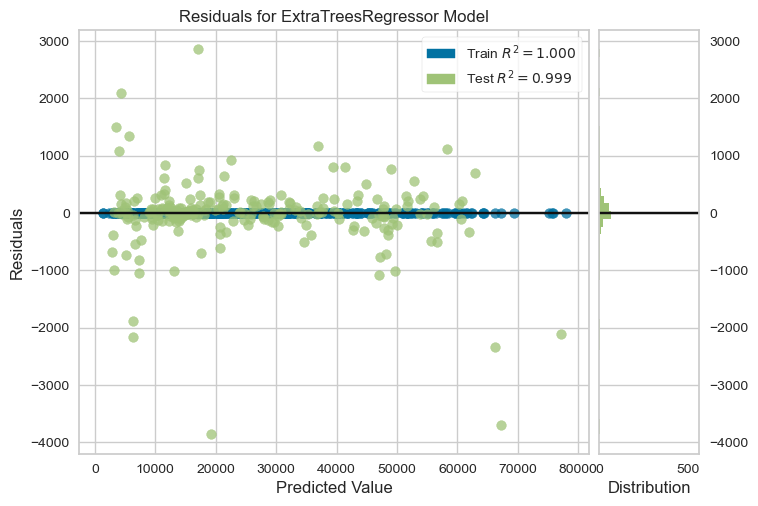

In [10]:
plot_model(et)

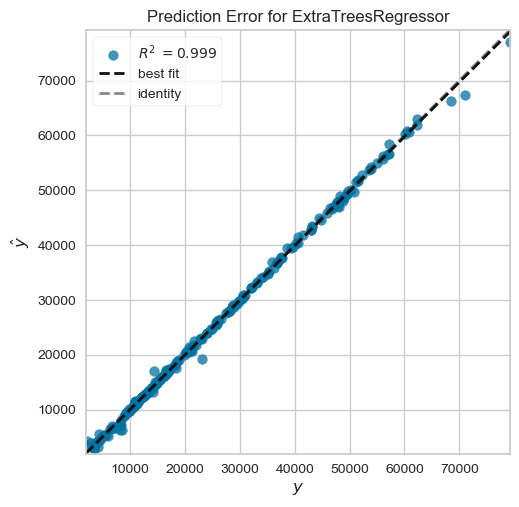

In [11]:
plot_model(et, plot = 'error')

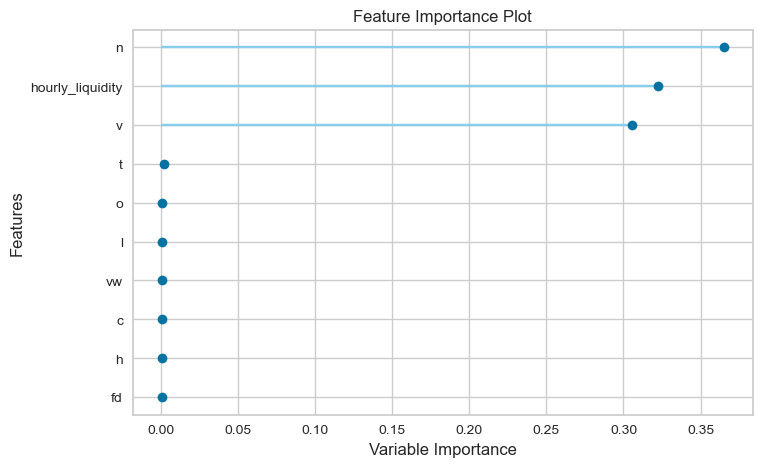

In [12]:
plot_model(tuned_et, plot='feature')

In [13]:
predict_model(et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,313.4449,383092.4605,618.9446,0.9986,0.0782,0.0278


In [14]:
final_et = finalize_model(et)
print(final_et)

Pipeline(memory=FastMemory(location=C:\Users\Rui\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['v', 'vw', 'o', 'c', 'h', 'l', 't',
                                             'n', 'hourly_liquidity', 'fd'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['datetime'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['datetime'],
                                    transformer=LeaveOneOutEncoder(cols=['datetime'],
                                                                   handle_missing='return_nan',
                                                                   random_state=123))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])
